### Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from fbprophet import Prophet

### Loading the Data

In [ ]:
df = pd.read_csv('household_power_consumption.csv', na_values = ['nan', '?'],
                 low_memory=False, infer_datetime_format=True,
                 parse_dates={'datetime':[0,1]}, index_col=['datetime'])

### Preprocessing

#### filling missing values

In [ ]:
print(df.isnull().sum())
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


#### Down-Sampling to Daily(Aggregating Minute Fields)

In [ ]:
new_df = df.resample('D').sum()

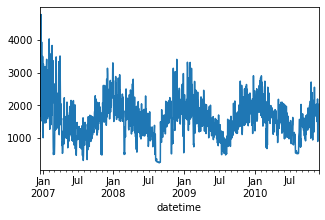

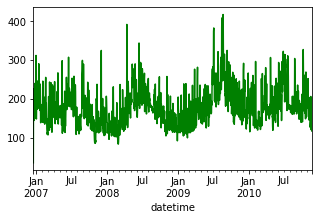

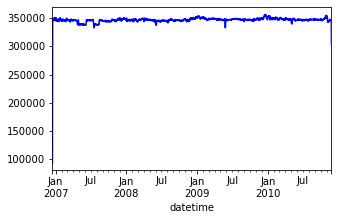

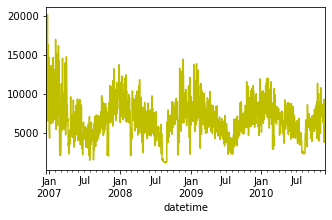

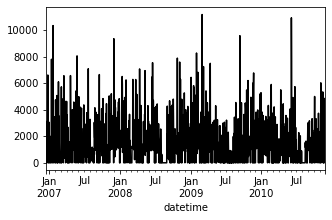

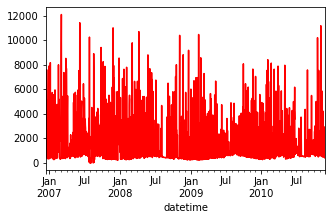

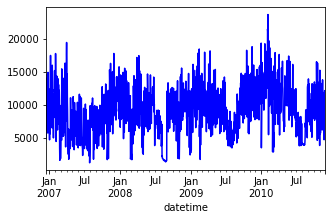

In [ ]:
plt.figure(figsize=(5, 3))
new_df.Global_active_power.plot()
plt.show()
plt.figure(figsize=(5, 3))
new_df.Global_reactive_power.plot(color='g')
plt.show()
plt.figure(figsize=(5, 3))
new_df.Voltage.plot(color='b')
plt.show()
plt.figure(figsize=(5, 3))
new_df.Global_intensity.plot(color='y')
plt.show()
plt.figure(figsize=(5, 3))
new_df.Sub_metering_1.plot(color='black')
plt.show()
plt.figure(figsize=(5, 3))
new_df.Sub_metering_2.plot(color='r')
plt.show()
plt.figure(figsize=(5, 3))
new_df.Sub_metering_3.plot(color='b')
plt.show()

In [ ]:
from scipy.stats import pearsonr
pear = pearsonr(df['Global_active_power'], df['Global_reactive_power'])
print(pear)

(0.24701705264431473, 0.0)


In [ ]:
pear = pearsonr(df['Voltage'],  df['Global_intensity'])
print(pear)

(-0.4113630717684046, 0.0)


### Checking if the Time Series Data is Stationary or not

In [ ]:
print('Global_active_power')
adf_result = adfuller(new_df.Global_active_power)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('No. of lags used:', adf_result[2])
print('No. of observations used :', adf_result[3])
if adf_result[1] < 0.05:
    print('TSD is Stationary')
else:
    print('TSD is not Stationary')
print( 'Critical Values:' )
for k, v in adf_result[4].items():
    print( f' {k} : {v} ' )

print('-------------------------------------------------------')
print('Global_reactive_power')
adf_result = adfuller(new_df.Global_reactive_power)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('No. of lags used:', adf_result[2])
print('No. of observations used :', adf_result[3])
if adf_result[1] < 0.05:
    print('TSD is Stationary')
else:
    print('TSD is not Stationary')
print( 'Critical Values:' )
for k, v in adf_result[4].items():
    print( f' {k} : {v} ' )

print('-------------------------------------------------------')
print('Global_intensity')
adf_result = adfuller(new_df.Global_intensity)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('No. of lags used:', adf_result[2])
print('No. of observations used :', adf_result[3])
if adf_result[1] < 0.05:
    print('TSD is Stationary')
else:
    print('TSD is not Stationary')
print( 'Critical Values:' )
for k, v in adf_result[4].items():
    print( f' {k} : {v} ' )

Global_active_power
ADF Statistic: -3.7317038452674423
p-value: 0.0036886778465985374
No. of lags used: 22
No. of observations used : 1419
TSD is Stationary
Critical Values:
 1% : -3.434966750462565 
 5% : -2.8635789736973725 
 10% : -2.5678555388041384 
-------------------------------------------------------
Global_reactive_power
ADF Statistic: -3.825850878287905
p-value: 0.0026536286982084107
No. of lags used: 22
No. of observations used : 1419
TSD is Stationary
Critical Values:
 1% : -3.434966750462565 
 5% : -2.8635789736973725 
 10% : -2.5678555388041384 
-------------------------------------------------------
Global_intensity
ADF Statistic: -3.8315901949388
p-value: 0.002600148450486235
No. of lags used: 22
No. of observations used : 1419
TSD is Stationary
Critical Values:
 1% : -3.434966750462565 
 5% : -2.8635789736973725 
 10% : -2.5678555388041384 


In [ ]:
print('Voltage')
adf_result = adfuller(new_df.Voltage)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('No. of lags used:', adf_result[2])
print('No. of observations used :', adf_result[3])
if adf_result[1] < 0.05:
    print('TSD is Stationary')
else:
    print('TSD is not Stationary')
print( 'Critical Values:' )
for k, v in adf_result[4].items():
    print( f' {k} : {v} ' )

print('-------------------------------------------------------')
print('Sub_metering_1')
adf_result = adfuller(new_df.Sub_metering_1)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('No. of lags used:', adf_result[2])
print('No. of observations used :', adf_result[3])
if adf_result[1] < 0.05:
    print('TSD is Stationary')
else:
    print('TSD is not Stationary')
print( 'Critical Values:' )
for k, v in adf_result[4].items():
    print( f' {k} : {v} ' )

print('-------------------------------------------------------')
print('Sub_metering_2')
adf_result = adfuller(new_df.Sub_metering_2)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('No. of lags used:', adf_result[2])
print('No. of observations used :', adf_result[3])
if adf_result[1] < 0.05:
    print('TSD is Stationary')
else:
    print('TSD is not Stationary')
print( 'Critical Values:' )
for k, v in adf_result[4].items():
    print( f' {k} : {v} ' )

Voltage
ADF Statistic: -2.959236896288301
p-value: 0.03888052099723622
No. of lags used: 23
No. of observations used : 1418
TSD is Stationary
Critical Values:
 1% : -3.4349700122033804 
 5% : -2.8635804131233096 
 10% : -2.567856305330816 
-------------------------------------------------------
Sub_metering_1
ADF Statistic: -5.467586362135133
p-value: 2.43917012251558e-06
No. of lags used: 22
No. of observations used : 1419
TSD is Stationary
Critical Values:
 1% : -3.434966750462565 
 5% : -2.8635789736973725 
 10% : -2.5678555388041384 
-------------------------------------------------------
Sub_metering_2
ADF Statistic: -5.082566884596905
p-value: 1.519580370997695e-05
No. of lags used: 20
No. of observations used : 1421
TSD is Stationary
Critical Values:
 1% : -3.4349602407782758 
 5% : -2.8635761009296763 
 10% : -2.5678540089914974 


In [ ]:
print('-------------------------------------------------------')
print('Sub_metering_3')
adf_result = adfuller(new_df.Sub_metering_3)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('No. of lags used:', adf_result[2])
print('No. of observations used :', adf_result[3])
if adf_result[1] < 0.05:
    print('TSD is Stationary')
else:
    print('TSD is not Stationary')
print( 'Critical Values:' )
for k, v in adf_result[4].items():
    print( f' {k} : {v} ' )

-------------------------------------------------------
Sub_metering_3
ADF Statistic: -4.06203405678465
p-value: 0.0011183422193876734
No. of lags used: 20
No. of observations used : 1421
TSD is Stationary
Critical Values:
 1% : -3.4349602407782758 
 5% : -2.8635761009296763 
 10% : -2.5678540089914974 


All TSDs are Stationary

### Creating the Model

In [ ]:
new_df.reset_index(inplace=True)
prohp_df = new_df[['datetime', 'Global_active_power']]

In [ ]:
prohp_df = prohp_df.rename(columns = {'datetime': 'ds','Global_active_power': 'y'})

#### Train Test Split

In [ ]:
train_df = prohp_df.iloc[:1077, :]
test_df = prohp_df.iloc[1077:, :]
test_df

,ds,y
1077,2009-11-27,1380.026
1078,2009-11-28,1858.950
1079,2009-11-29,1650.962
1080,2009-11-30,1745.190
1081,2009-12-01,1756.378
...,...,...
1437,2010-11-22,2041.536
1438,2010-11-23,1577.536
1439,2010-11-24,1796.248
1440,2010-11-25,1431.164


In [ ]:
model = Prophet()
model.fit(train_df)
forecast = model.predict(test_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Calculating Metrics

In [ ]:
# Mean Absolute Percentage Error
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
mape = mean_absolute_percentage_error(test_df['y'], forecast['yhat'])
print('%.2f'%mape, 'MAPE')

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(np.array(test_df['y']), np.array(forecast['yhat'])))
print('%.2f'%rmse, 'RMSE')

0.21 MAPE
375.00 RMSE


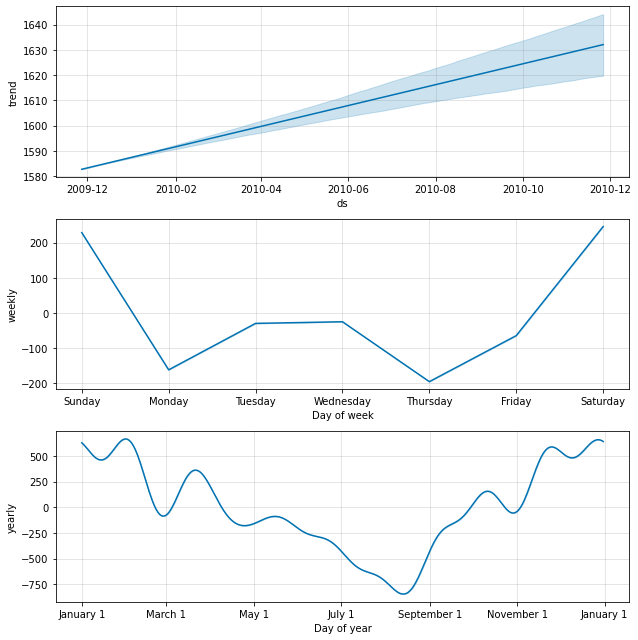

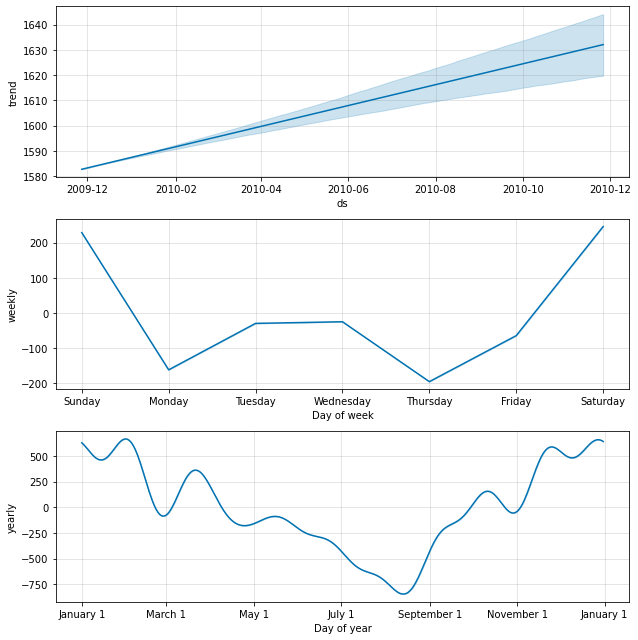

In [ ]:
model.plot_components(forecast)

August has the lowest value

#### Multivariate Train test split

In [ ]:
multi = new_df.rename(columns = {'datetime':'ds','Global_active_power':'y','Global_reactive_power':'add1',
                                                'Voltage':'add2','Global_intensity':'add3','Sub_metering_1':'add4',
                                                'Sub_metering_2':'add5','Sub_metering_3':'add6'})

In [ ]:
multi_train_df = multi.iloc[:1077,:]
multi_test_df = multi.iloc[1077:,:]
multi_test_df

,ds,y,add1,add2,add3,add4,add5,add6
1077,2009-11-27,1380.026,133.052,348276.70,5704.0,0.0,396.0,11599.0
1078,2009-11-28,1858.950,225.218,347898.89,7784.8,3199.0,386.0,14350.0
1079,2009-11-29,1650.962,191.056,350364.56,6878.4,1073.0,3061.0,7828.0
1080,2009-11-30,1745.190,153.382,351020.60,7232.2,1080.0,361.0,12039.0
1081,2009-12-01,1756.378,141.874,349391.74,7312.8,0.0,354.0,10821.0
...,...,...,...,...,...,...,...,...
1437,2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0
1438,2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0
1439,2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0
1440,2010-11-25,1431.164,116.128,347812.21,6004.0,1076.0,426.0,5072.0


In [ ]:
model_2 = Prophet()
model_2.add_regressor('add1')
model_2.add_regressor('add2')
model_2.add_regressor('add3')
model_2.add_regressor('add4')
model_2.add_regressor('add5')
model_2.add_regressor('add6')

model_2.fit(multi_train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# making forecasts
forecasts = model_2.predict(multi_test_df)

#### Metrics

In [ ]:
# Mean Absolute Percentage Error
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
mape = mean_absolute_percentage_error(multi_test_df['y'], forecasts['yhat'])
print('%.2f'%mape, 'MAPE')

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(np.array(multi_test_df['y']), np.array(forecasts['yhat'])))
print('%.2f'%rmse, 'RMSE')

0.03 MAPE
38.33 RMSE


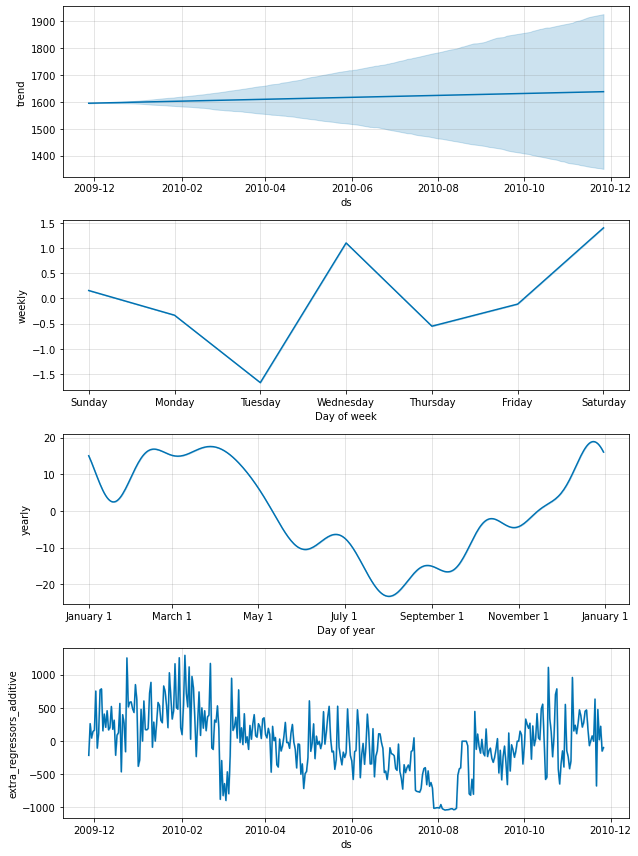

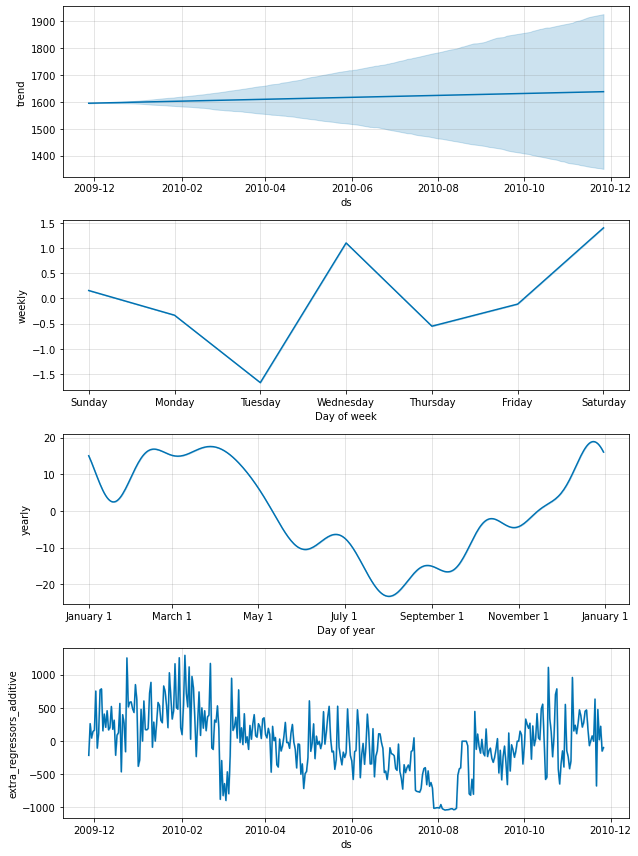

In [ ]:
model_2.plot_components(forecasts)

Tuesday has the lowest value